In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

Files already downloaded and verified


In [22]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

In [23]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)

Files already downloaded and verified


In [24]:
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                              shuffle=False, num_workers=2)

In [25]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

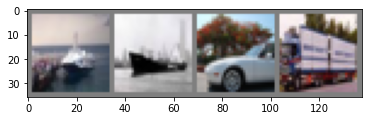

 ship  ship   car truck


In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [29]:
import torch.nn as nn
import torch.nn.functional as F

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class CNNetwork(nn.Module):
    def __init__(self):
        super(CNNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn_net = CNNetwork()

In [43]:
cnn_net.parameters()

<generator object Module.parameters at 0x7fafe86d9dd0>

In [44]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_net.parameters(), lr=0.001, momentum=0.9)

In [45]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = cnn_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.184
[1,  4000] loss: 1.823
[1,  6000] loss: 1.674
[1,  8000] loss: 1.595
[1, 10000] loss: 1.537
[1, 12000] loss: 1.481
[2,  2000] loss: 1.400
[2,  4000] loss: 1.366
[2,  6000] loss: 1.349
[2,  8000] loss: 1.308
[2, 10000] loss: 1.302
[2, 12000] loss: 1.310
Finished Training


In [46]:
PATH = './cifar_net.pth'
torch.save(cnn_net.state_dict(), PATH)

In [47]:
cnn_net = CNNetwork()
cnn_net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [48]:
dataiter = iter(testloader)


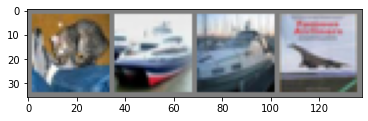

GroundTruth:  cat ship ship plane 
Predicted:   frog   car   car  ship


In [49]:
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join('%s' % classes[labels[j]]+' ' for j in range(4)))

outputs = cnn_net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [50]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
